In [ ]:
import numpy as np
from sklearn import datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y)


array([0, 1, 2])

In [ ]:
print(iris_y[:10])

[0 0 0 0 0 0 0 0 0 0]


In [ ]:
# losowo rozłóżmy dane
indices = np.random.permutation (len(iris_X))
print("\n", indices)
# podzielmy dane na treningowe i testowe
iris_X_train = iris_X[indices[:-50]]
iris_y_train = iris_y[indices[:-50]]
iris_X_test = iris_X[indices[-50:]]
iris_y_test = iris_y[indices[-50:]]

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # parametr nk najbliższych sąsiadów
knn.fit(iris_X_train, iris_y_train) # trenowanie
knn.predict(iris_X_test) # przewidujemy.
#print("\n", iris_X_train[:10])
#print("\n", iris_y_train)
#print("\n", iris_X_test[:10])
#print("\n", iris_y_test)


 [144  58 133  12  84  13 123   8  24 128  70  66  78  18  95  94 115 120
  65  47  71  34 121   4  89 148   1  29   9 129 112  57  25 118  99  64
  80  76 125  11 147 114  39 132  53  40  72  23  49  67  30  37  90  96
  38 109 117  59  86 143  21  50  19  33  51  26 119  68 141 122  10  98
  48 130  73  20  91  45  55 106  85  17  28 110 127 142 149 111  35   7
  42  60 116 113 108  36  27  52  93   6 103  62  92 131 105 146  41 104
 139  32 136  82 107  16 135  46  15  83 134  43  14 126  74  22  81  79
  88   5 124  87 138 137 140  56  63  77  44   2  54   0  69 145   3  97
  61 102 101 100  31  75]


array([2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       1, 0, 1, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1,
       1, 2, 2, 2, 0, 1])

<Axes: >

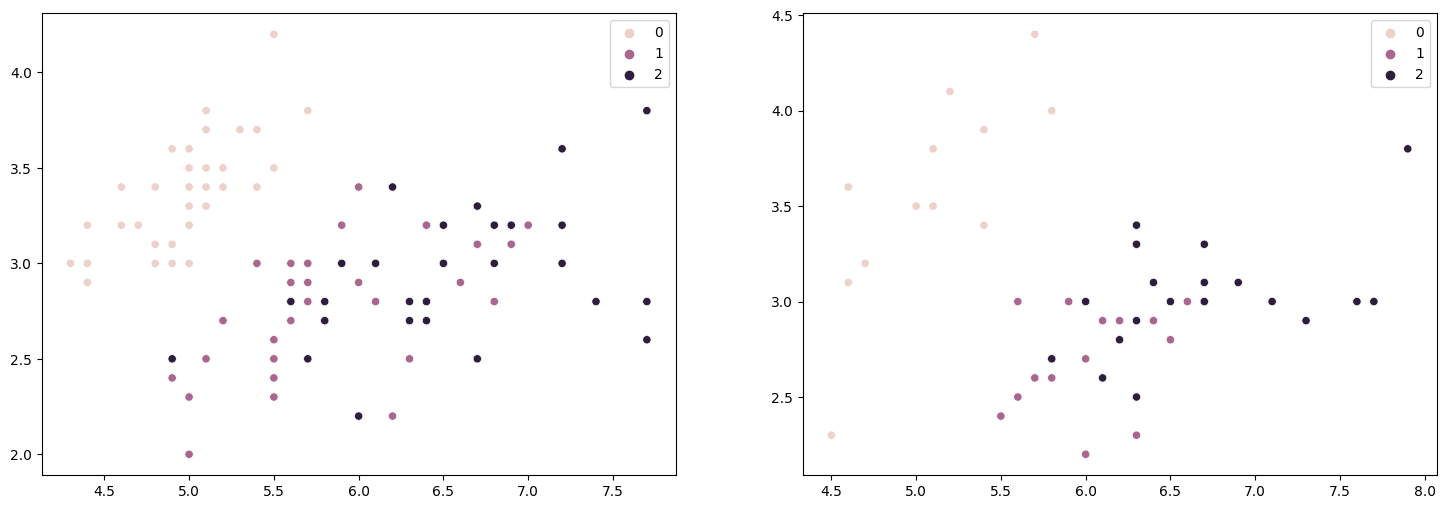

In [ ]:
# Wyrysujmy
import seaborn as sns
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(18, 6))
# dane trenujące/uczące
plt.subplot(1, 2, 1)
sns.scatterplot(x=iris_X_train[:,0], y=iris_X_train[:,1], hue=iris_y_train)
# dane testowe, na których sprawdzamy
plt.subplot(1, 2, 2)
sns.scatterplot(x=iris_X_test[:,0], y=iris_X_test[:,1], hue=iris_y_test)

Accuracy: 1.00


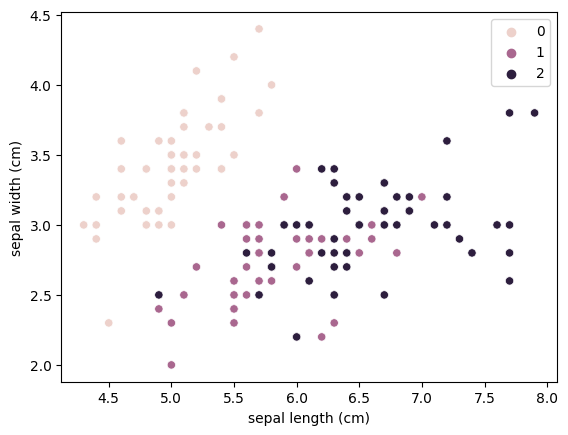

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# load the iris dataset
iris = datasets.load_iris()

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# create and fit a nearest-neighbor classifier
knn = KNeighborsClassifier(n_neighbors=5)  # parameter k for the number of nearest neighbors
knn.fit(X_train, y_train)

# predict the class labels for the test set
y_pred = knn.predict(X_test)

# calculate the accuracy of the classifier on the test set
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

# create a scatter plot of the data
x_index = 0
y_index = 1
sns.scatterplot(x=iris.data[:, x_index], y=iris.data[:, y_index], hue=iris.target)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.show()


<ipython-input-23-edacb724dc07>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))


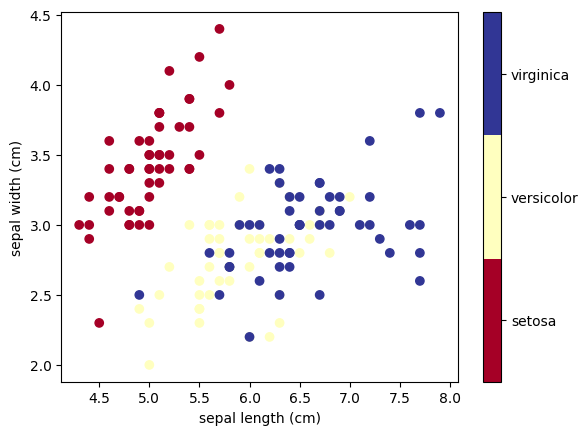

In [ ]:
# HIDE CODE

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
            
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

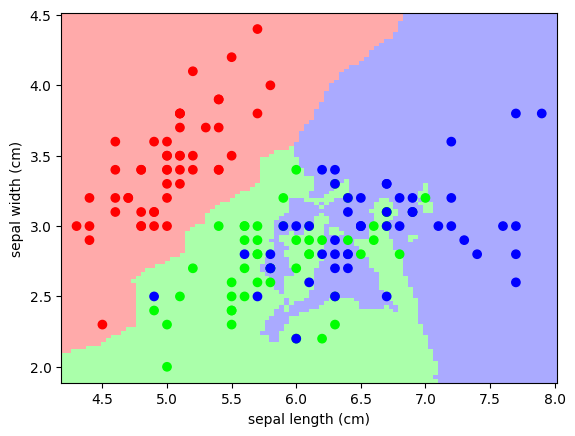

In [ ]:
# Setup
import numpy as np

from sklearn import datasets
from sklearn import neighbors

import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_iris_knn():
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # we only take the first two features.
    y = iris.target

    knn = neighbors.KNeighborsClassifier(n_neighbors=3)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('sepal length (cm)')
    pl.ylabel('sepal width (cm)')
    pl.axis('tight')
    
plot_iris_knn()

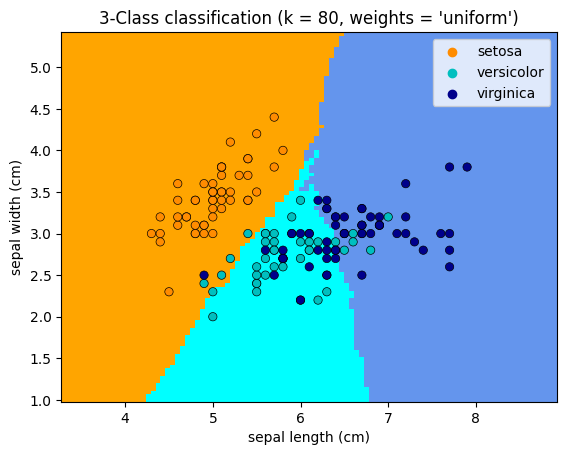

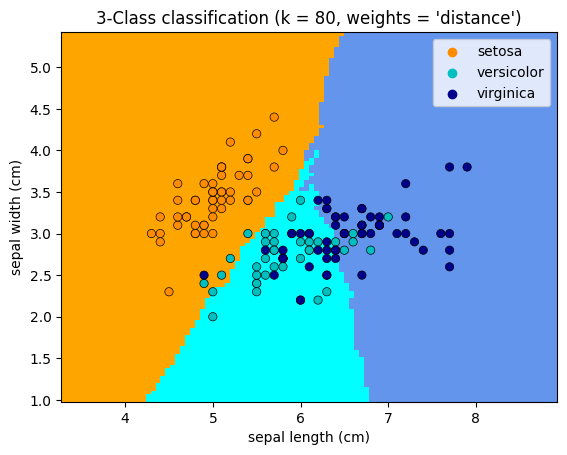

0.7666666666666667

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

n_neighbors = 80

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()
# oszacowac czulosc metody, podac ilosc punktow ktore zostaly przydzielone dzobrze
accuracy_score(y_true = y, y_pred = clf.predict(X), normalize=True)

oszacowac czulosc metody, podac ilosc punktow ktore zostaly przydzielone dobrze :

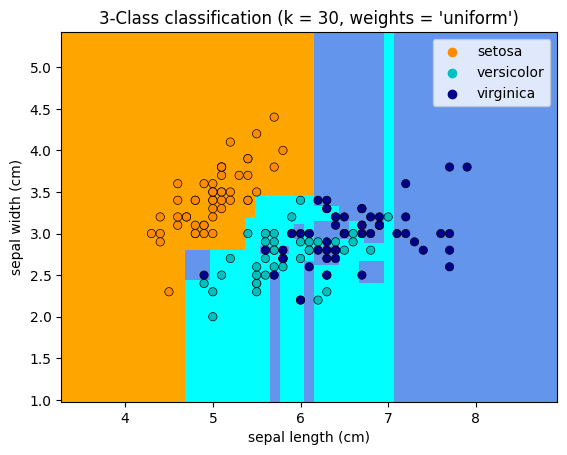

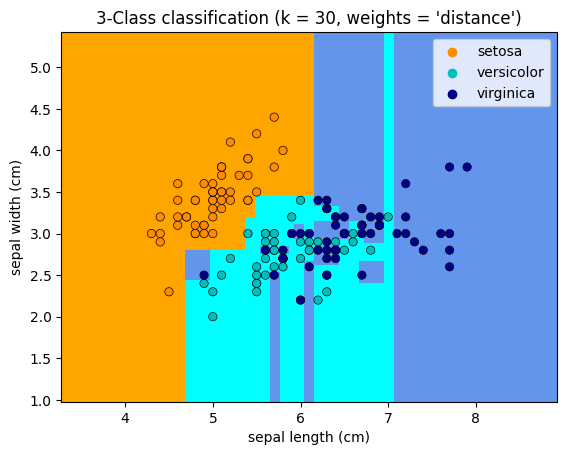

0.9266666666666666

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

n_neighbors = 30

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = tree.DecisionTreeClassifier()
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()
# oszacowac czulosc metody, podac ilosc punktow ktore zostaly przydzielone dzobrze
accuracy_score(y_true = y, y_pred = clf.predict(X), normalize=True)